In [1]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
# Reading the data
df = pd.read_csv(r"C:\Users\suzan\Desktop\Computer Science\TERM 2 - DATA SCIENCE\Project\Project Submission\realestate.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1544 entries, 0 to 1543
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ListId              1544 non-null   int64  
 1   Status              1544 non-null   object 
 2   DaysOnMarket        1544 non-null   int64  
 3   GrossFloorArea      1538 non-null   float64
 4   AdjustedLivingArea  1533 non-null   float64
 5   PropertyType        1544 non-null   object 
 6   HOAFee              1530 non-null   float64
 7   PropertyTax         1537 non-null   object 
 8   Bedrooms            1544 non-null   int64  
 9   Bathrooms           1538 non-null   float64
 10  YearBuilt           1533 non-null   float64
 11  GarageSpace         1533 non-null   float64
 12  Address             1544 non-null   object 
 13  Area                1541 non-null   object 
 14  City                1544 non-null   object 
 15  Province            1544 non-null   object 
 16  Latitu

In [4]:
# Checking the columns
df.columns

Index(['ListId', 'Status ', 'DaysOnMarket', 'GrossFloorArea',
       'AdjustedLivingArea', 'PropertyType', 'HOAFee', 'PropertyTax',
       'Bedrooms', 'Bathrooms', 'YearBuilt', 'GarageSpace', 'Address', 'Area',
       'City', 'Province', 'Latitude', 'Longitude', 'ListPrice'],
      dtype='object')

In [5]:
# Dropping irrelevant columns

df.drop(['ListId', 'Status ', 'DaysOnMarket', 'AdjustedLivingArea', 
         'PropertyType', 'HOAFee','PropertyTax', 'YearBuilt', 'GarageSpace', 
         'Address', 'Area','City', 'Province', 'Latitude', 'Longitude' ], axis = 1, inplace = True)

In [6]:
df.head()

,GrossFloorArea,Bedrooms,Bathrooms,ListPrice
0,1244.0,3,2.0,980000
1,646.0,1,1.0,399900
2,505.0,1,1.0,479000
3,1714.0,3,2.0,385900
4,574.0,1,1.0,662000


In [7]:
# Checking for null values

df.isnull().sum()

GrossFloorArea    6
Bedrooms          0
Bathrooms         6
ListPrice         0
dtype: int64

In [8]:
df = df.dropna()

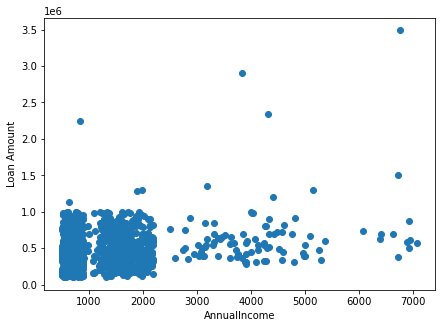

In [9]:
# Plotting Priccs vs GrossFloor Area

plt.figure(figsize=(7,5))
plt.scatter(df['GrossFloorArea'], df['ListPrice'])
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount')
plt.show()

In [10]:
# Scaling the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

In [11]:
# finding Inertia values for different K

inertia_values = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    inertia_values.append(kmeanModel.inertia_)

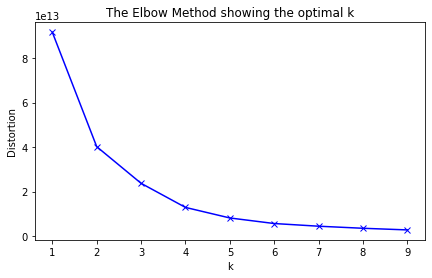

In [12]:
# Elbow Graph

plt.figure(figsize=(7,4))
plt.plot(K, inertia_values, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [13]:
# Fitting to Kmeans model,  Best K = 5 from above

kmeans = KMeans(n_clusters=5, init='k-means++')
kmeans.fit(data_scaled)

KMeans(n_clusters=5)

In [14]:
# inertia on the fitted data

kmeans.inertia_

1360.3766800223732

In [15]:
clusters = kmeans.labels_
df['labels']=  clusters
df.head()

,GrossFloorArea,Bedrooms,Bathrooms,ListPrice,labels
0,1244.0,3,2.0,980000,1
1,646.0,1,1.0,399900,2
2,505.0,1,1.0,479000,2
3,1714.0,3,2.0,385900,3
4,574.0,1,1.0,662000,0


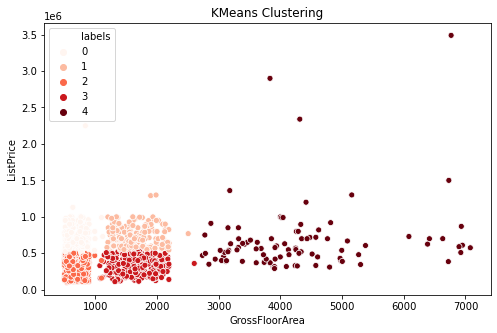

In [16]:
# Plotting the clusters

plt.figure(figsize=(8, 5))
plt.title("KMeans Clustering")
sns.scatterplot(data=df, x='GrossFloorArea', y='ListPrice', hue='labels', palette='Reds', legend='full')
plt.legend()
plt.show()

In [17]:
# Checking for a new data sample

arr = np.array([[4524.0, 5, 3.0, 280000]])
arr.reshape(-1,1)

y = scaler.transform(arr)
pred = kmeans.predict(y)
pred

array([4])